Step 1: Importing Python libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Importing Customed Stock Dataset

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns = 'Unnamed: 0', inplace = True)
stocks

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
0,1997-05-15,Amazon,1443120000,0.0979,0.1219,0.1250,0.0964,NaN,NaN
1,1997-05-16,Amazon,294000000,0.0865,0.0984,0.0990,0.0854,NaN,NaN
2,1997-05-19,Amazon,122136000,0.0854,0.0880,0.0885,0.0812,NaN,NaN
3,1997-05-20,Amazon,109344000,0.0818,0.0865,0.0875,0.0818,NaN,NaN
4,1997-05-21,Amazon,377064000,0.0714,0.0818,0.0823,0.0688,NaN,NaN
...,...,...,...,...,...,...,...,...,...
39960,2024-09-23,Tesla,86927200,250.0000,242.6100,250.0000,241.9200,198.010055,215.506164
39961,2024-09-24,Tesla,88491000,254.2700,254.0800,257.1900,249.0500,198.042022,215.708164
39962,2024-09-25,Tesla,65034300,257.0200,252.5400,257.0500,252.2800,198.143497,215.903014
39963,2024-09-26,Tesla,67142200,254.2200,260.6000,261.7500,251.5300,198.232514,216.092658


Step 3: Descriptive Stats

In [3]:
stocks.describe()

,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
count,3.996500e+04,39965.000000,39965.000000,39965.00000,39965.000000,38873.000000,37781.000000
mean,1.382268e+08,69.172364,69.157528,70.09737,68.197662,65.964074,63.348913
std,2.212977e+08,114.215024,114.207266,115.75143,112.615077,106.521129,100.735115
min,0.000000e+00,0.049100,0.049700,0.04970,0.049100,0.071181,0.084898
25%,2.927050e+07,1.912500,1.911000,1.95000,1.876600,2.063511,2.110828
50%,6.878600e+07,18.982000,18.967500,19.24070,18.731800,19.172444,19.085581
75%,1.453220e+08,85.840000,86.124500,86.97800,84.880000,82.388361,76.225068
max,7.421641e+09,722.260000,724.730000,725.26000,716.210000,622.647432,542.559205


In [4]:
stocks.groupby('Stock_Name').describe().transpose()

Stock_Name                 Amazon         Apple          Meta     Microsoft  \
Volume        count  6.888000e+03  1.104000e+04  3.110000e+03  9.714000e+03   
              mean   1.374814e+08  3.170834e+08  2.970351e+07  5.661931e+07   
              std    1.380286e+08  3.352135e+08  2.591104e+07  3.813755e+07   
              min    9.744000e+06  0.000000e+00  5.467500e+06  2.304000e+06   
              25%    6.431160e+07  1.124505e+08  1.570612e+07  3.178000e+07   
              50%    1.015450e+08  2.048452e+08  2.200285e+07  4.980260e+07   
              75%    1.562825e+08  3.978450e+08  3.411580e+07  7.053310e+07   
              max    2.086584e+09  7.421641e+09  5.735764e+08  1.031789e+09   
Close in $    count  6.888000e+03  1.104000e+04  3.110000e+03  9.714000e+03   
              mean   3.821083e+01  2.307391e+01  1.772127e+02  5.997161e+01   
              std    5.468358e+01  4.757351e+01  1.177375e+02  9.299445e+01   
              min    6.980000e-02  4.910000e-02  1.773000e+01  9.030000e-02   
              25%    2.084375e+00  2.991000e-01  8.488250e+01  5.744150e+00   
              50%    8.790250e+00  5.357000e-01  1.637350e+02  2.739000e+01   
              75%    5.689200e+01  2.054247e+01  2.317300e+02  4.692000e+01   
              max    2.000000e+02  2.348200e+02  5.683100e+02  4.675600e+02   
Open in $     count  6.888000e+03  1.104000e+04  3.110000e+03  9.714000e+03   
              mean   3.822028e+01  2.305877e+01  1.771253e+02  5.995937e+01   
              std    5.471054e+01  4.753493e+01  1.176777e+02  9.298355e+01   
              min    7.030000e-02  4.970000e-02  1.808000e+01  8.850000e-02   
              25%    2.076875e+00  2.991000e-01  8.509500e+01  5.742200e+00   
              50%    8.777500e+00  5.357000e-01  1.635500e+02  2.735000e+01   
              75%    5.670713e+01  2.056708e+01  2.302125e+02  4.687875e+01   
              max    2.000900e+02  2.364800e+02  5.757300e+02  4.670000e+02   
High in $     count  6.888000e+03  1.104000e+04  3.110000e+03  9.714000e+03   
              mean   3.866975e+01  2.330697e+01  1.794287e+02  6.057114e+01   
              std    5.532810e+01  4.804369e+01  1.191884e+02  9.383214e+01   
              min    7.240000e-02  4.970000e-02  1.827000e+01  9.200000e-02   
              25%    2.127950e+00  3.053500e-01  8.622750e+01  5.830050e+00   
              50%    8.894500e+00  5.424000e-01  1.659900e+02  2.766000e+01   
              75%    5.719862e+01  2.073698e+01  2.337525e+02  4.745750e+01   
              max    2.012000e+02  2.372300e+02  5.774000e+02  4.683500e+02   
Low in $      count  6.888000e+03  1.104000e+04  3.110000e+03  9.714000e+03   
              mean   3.773070e+01  2.282068e+01  1.748997e+02  5.932609e+01   
              std    5.402657e+01  4.705834e+01  1.162241e+02  9.206378e+01   
              min    6.560000e-02  4.910000e-02  1.755000e+01  8.850000e-02   
              25%    2.045000e+00  2.920000e-01  8.356750e+01  5.656200e+00   
              50%    8.687000e+00  5.268000e-01  1.610800e+02  2.713000e+01   
              75%    5.640250e+01  2.037105e+01  2.268525e+02  4.643313e+01   
              max    1.990500e+02  2.330900e+02  5.645100e+02  4.644600e+02   
MA_Six_Months count  6.706000e+03  1.085800e+04  2.928000e+03  9.532000e+03   
              mean   3.677745e+01  2.171921e+01  1.718145e+02  5.706379e+01   
              std    5.214934e+01  4.455918e+01  9.895117e+01  8.612994e+01   
              min    1.671361e-01  7.118087e-02  2.465333e+01  1.118645e-01   
              25%    2.131598e+00  3.170425e-01  9.293287e+01  5.957725e+00   
              50%    8.789212e+00  5.069932e-01  1.654047e+02  2.704437e+01   
              75%    5.286234e+01  1.995051e+01  2.245008e+02  4.540478e+01   
              max    1.784616e+02  1.976319e+02  4.852634e+02  4.194021e+02   
MA_One_Year   count  6.524000e+03  1.067600e+04  2.746000e+03  9.350000e+03   
              mean   3.561498e+01  2.050444e+01  1

Step 4: Prepping for Visualizations

In [5]:
# Grabbing today's date
max_date = max(stocks['Date'])
max_date

'2024-09-27'

In [6]:
# Filtering the dataset by using today's date
stocks_max_date = stocks[stocks['Date']==max_date]
stocks_max_date

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
6887,2024-09-27,Amazon,36002300,187.97,190.68,190.90,187.34,178.461585,155.021014
17927,2024-09-27,Apple,34026000,227.79,228.46,229.52,227.30,197.631858,189.724767
21037,2024-09-27,Meta,9398400,567.36,570.10,570.84,564.51,485.263388,391.319534
30751,2024-09-27,Microsoft,14896100,428.02,431.52,431.85,427.47,419.402131,378.163589
36377,2024-09-27,Netflix,2395600,707.35,708.36,710.71,701.25,622.647432,519.105616
39964,2024-09-27,Tesla,70988100,260.46,257.38,260.70,254.12,198.358033,216.293808


Text(0.5, 1.0, 'Shares Traded per Stock For Today')

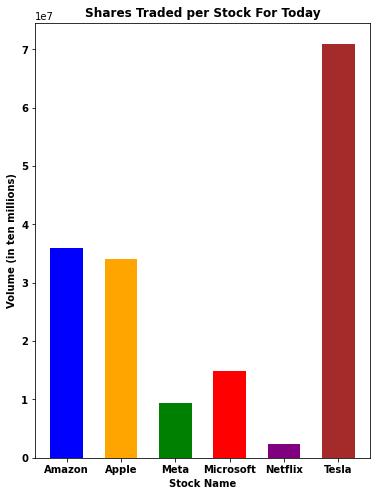

In [7]:
shares_volume = plt.figure(figsize=(6,8))
colors = ['blue','orange','green','red','purple','brown']
plt.bar(stocks_max_date['Stock_Name'], stocks_max_date['Volume'],
        color = colors, width = 0.6),
plt.xlabel('Stock Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('Volume (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, rotation = 0, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.title('Shares Traded per Stock For Today', fontsize = 12, fontweight = 'bold')

In [8]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks.set_index('Date')
stocks

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1997-05-15,Amazon,1443120000,0.0979,0.1219,0.1250,0.0964,NaN,NaN
1997-05-16,Amazon,294000000,0.0865,0.0984,0.0990,0.0854,NaN,NaN
1997-05-19,Amazon,122136000,0.0854,0.0880,0.0885,0.0812,NaN,NaN
1997-05-20,Amazon,109344000,0.0818,0.0865,0.0875,0.0818,NaN,NaN
1997-05-21,Amazon,377064000,0.0714,0.0818,0.0823,0.0688,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-09-23,Tesla,86927200,250.0000,242.6100,250.0000,241.9200,198.010055,215.506164
2024-09-24,Tesla,88491000,254.2700,254.0800,257.1900,249.0500,198.042022,215.708164
2024-09-25,Tesla,65034300,257.0200,252.5400,257.0500,252.2800,198.143497,215.903014


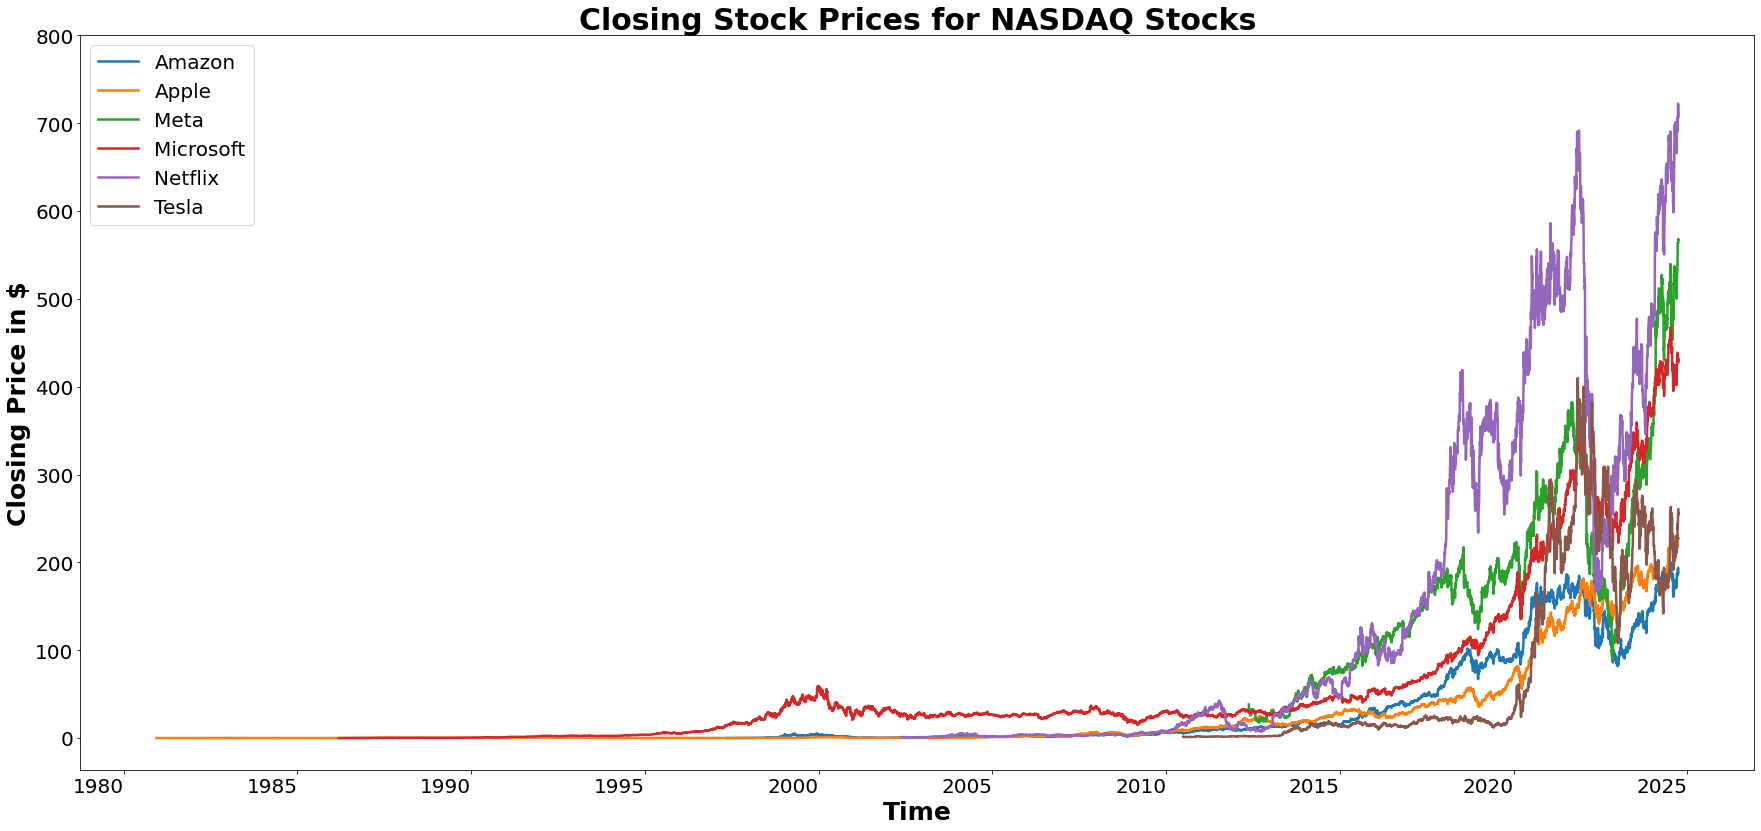

In [9]:
#Using a line chart to graph closing price of stocks within a 10 year frame
six_stocks_ten_years = plt.figure(figsize=(30,15))
stocks.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5)
plt.title('Closing Stock Prices for NASDAQ Stocks', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 900, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [10]:
# Breaking dataset into multiple where each one is assigned to one specific stock, prepping for moving average analysis

In [11]:
moving_average = stocks[stocks['MA_One_Year'].notna()]
moving_average

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1998-10-23,Amazon,272496000,0.9677,0.9542,0.9859,0.9510,0.617291,0.392595
1998-10-26,Amazon,390336000,1.0120,0.9927,1.0156,0.9729,0.621438,0.395099
1998-10-27,Amazon,403284000,0.9693,1.0344,1.0500,0.9672,0.625385,0.397518
1998-10-28,Amazon,397836000,0.9755,0.9745,0.9958,0.9521,0.629375,0.399956
1998-10-29,Amazon,658644000,1.0542,1.0109,1.0604,0.9917,0.633810,0.402620
...,...,...,...,...,...,...,...,...
2024-09-23,Tesla,86927200,250.0000,242.6100,250.0000,241.9200,198.010055,215.506164
2024-09-24,Tesla,88491000,254.2700,254.0800,257.1900,249.0500,198.042022,215.708164
2024-09-25,Tesla,65034300,257.0200,252.5400,257.0500,252.2800,198.143497,215.903014


In [12]:
moving_average_amazon_stock = moving_average[moving_average['Stock_Name']=='Amazon']
moving_average_amazon_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1998-10-23,Amazon,272496000,0.9677,0.9542,0.9859,0.9510,0.617291,0.392595
1998-10-26,Amazon,390336000,1.0120,0.9927,1.0156,0.9729,0.621438,0.395099
1998-10-27,Amazon,403284000,0.9693,1.0344,1.0500,0.9672,0.625385,0.397518
1998-10-28,Amazon,397836000,0.9755,0.9745,0.9958,0.9521,0.629375,0.399956
1998-10-29,Amazon,658644000,1.0542,1.0109,1.0604,0.9917,0.633810,0.402620
...,...,...,...,...,...,...,...,...
2024-09-23,Amazon,36993100,193.8800,191.6400,194.4500,190.5700,177.492131,154.034329
2024-09-24,Amazon,43478900,193.9600,194.2700,195.3700,190.1300,177.732732,154.297699
2024-09-25,Amazon,26391100,192.5300,193.7500,193.9500,192.1600,177.973497,154.544630


In [13]:
moving_average_apple_stock = moving_average[moving_average['Stock_Name']=='Apple']
moving_average_apple_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1982-05-24,Apple,31987200,0.0642,0.0642,0.0647,0.0642,0.080626,0.101125
1982-05-25,Apple,51564800,0.0642,0.0642,0.0647,0.0642,0.080446,0.100949
1982-05-26,Apple,43276800,0.0636,0.0642,0.0642,0.0636,0.080290,0.100790
1982-05-27,Apple,31248000,0.0625,0.0631,0.0631,0.0625,0.080134,0.100653
1982-05-28,Apple,19196800,0.0625,0.0625,0.0631,0.0625,0.079994,0.100507
...,...,...,...,...,...,...,...,...
2024-09-23,Apple,54146000,226.4700,227.3400,229.4500,225.8100,196.669727,189.031753
2024-09-24,Apple,43556100,227.3700,228.6500,229.3500,225.7300,196.897760,189.216055
2024-09-25,Apple,42308700,226.3700,224.9300,227.2900,224.0200,197.127923,189.382658


In [14]:
moving_average_meta_stock = moving_average[moving_average['Stock_Name']=='Meta']
moving_average_meta_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2013-10-30,Meta,127073000,49.01,50.00,50.21,48.75,32.949672,29.215945
2013-10-31,Meta,248809000,50.21,47.16,52.00,46.50,33.069617,29.248767
2013-11-01,Meta,95033000,49.75,50.85,52.09,49.72,33.191913,29.291836
2013-11-04,Meta,80371000,48.22,49.37,49.75,48.02,33.302896,29.339014
2013-11-05,Meta,76835000,50.11,47.79,50.18,47.51,33.420984,29.388630
...,...,...,...,...,...,...,...,...
2024-09-23,Meta,12830700,564.41,569.50,573.98,562.41,480.470984,387.505452
2024-09-24,Meta,12993000,563.33,566.68,567.75,554.19,481.656995,388.462521
2024-09-25,Meta,16543400,568.31,564.05,576.88,563.72,482.880164,389.415836


In [15]:
moving_average_microsoft_stock = moving_average[moving_average['Stock_Name']=='Microsoft']
moving_average_microsoft_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
1987-08-20,Microsoft,82051200,0.3655,0.3559,0.3672,0.3559,0.301766,0.206918
1987-08-21,Microsoft,68976000,0.3715,0.3646,0.3759,0.3646,0.302870,0.207669
1987-08-24,Microsoft,97747200,0.3880,0.3715,0.3898,0.3663,0.304061,0.208456
1987-08-25,Microsoft,185961600,0.3984,0.3915,0.4054,0.3872,0.305316,0.209267
1987-08-26,Microsoft,114105600,0.4010,0.3984,0.4097,0.3967,0.306573,0.210093
...,...,...,...,...,...,...,...,...
2024-09-23,Microsoft,15128900,433.5100,434.2800,436.4600,430.3900,418.071803,376.595534
2024-09-24,Microsoft,17015800,429.1700,433.0000,433.3500,426.1000,418.390383,376.994658
2024-09-25,Microsoft,13396400,432.1100,429.8300,433.1200,428.5700,418.726503,377.384438


In [16]:
moving_average_netflix_stock = moving_average[moving_average['Stock_Name']=='Netflix']
moving_average_netflix_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2003-10-31,Netflix,16017400,4.0929,4.2029,4.2107,4.0371,1.935142,1.394786
2003-11-03,Netflix,14712600,4.1750,4.0993,4.2143,4.0857,1.952772,1.402946
2003-11-04,Netflix,15635200,4.2571,4.1464,4.3250,4.1314,1.970875,1.411295
2003-11-05,Netflix,17277400,4.1943,4.2321,4.2850,4.1393,1.988237,1.419616
2003-11-06,Netflix,109594800,3.6307,3.9429,4.0486,3.5736,2.002355,1.426539
...,...,...,...,...,...,...,...,...
2024-09-23,Netflix,3224300,705.3700,702.3900,712.2500,699.1600,617.318962,514.957589
2024-09-24,Netflix,3565700,722.2600,706.6300,722.4400,704.4500,618.705628,516.029452
2024-09-25,Netflix,2259800,721.5600,721.0000,725.1200,716.2100,620.078852,517.057863


In [17]:
moving_average_tesla_stock = moving_average[moving_average['Stock_Name']=='Tesla']
moving_average_tesla_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2011-12-06,Tesla,14277000,2.3247,2.2800,2.3320,2.2687,1.818838,1.697690
2011-12-07,Tesla,10114500,2.2793,2.3087,2.3260,2.2533,1.822929,1.699571
2011-12-08,Tesla,49587000,2.0593,2.0560,2.1100,1.9740,1.825902,1.700860
2011-12-09,Tesla,18592500,2.0693,2.0360,2.0747,2.0187,1.829126,1.702519
2011-12-12,Tesla,11380500,2.0273,2.0293,2.0413,2.0013,1.832113,1.704566
...,...,...,...,...,...,...,...,...
2024-09-23,Tesla,86927200,250.0000,242.6100,250.0000,241.9200,198.010055,215.506164
2024-09-24,Tesla,88491000,254.2700,254.0800,257.1900,249.0500,198.042022,215.708164
2024-09-25,Tesla,65034300,257.0200,252.5400,257.0500,252.2800,198.143497,215.903014


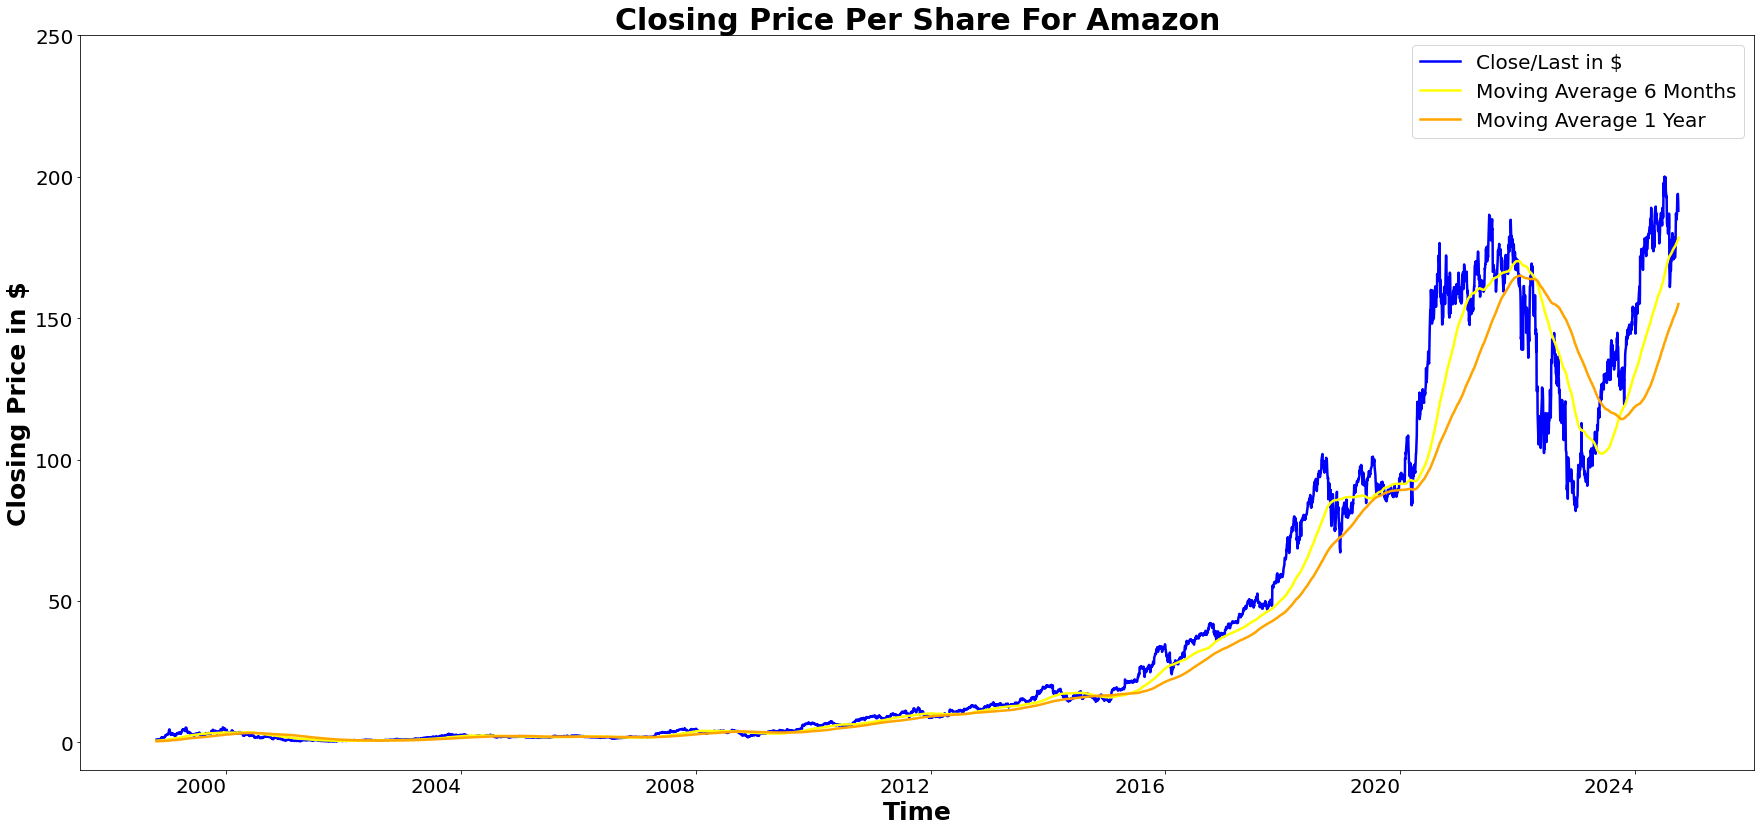

In [18]:
#Using a line chart to graph one year and five year moving averages for all stocks
amazon = plt.figure(figsize=(30,15))
moving_average_amazon_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_amazon_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_amazon_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Amazon', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

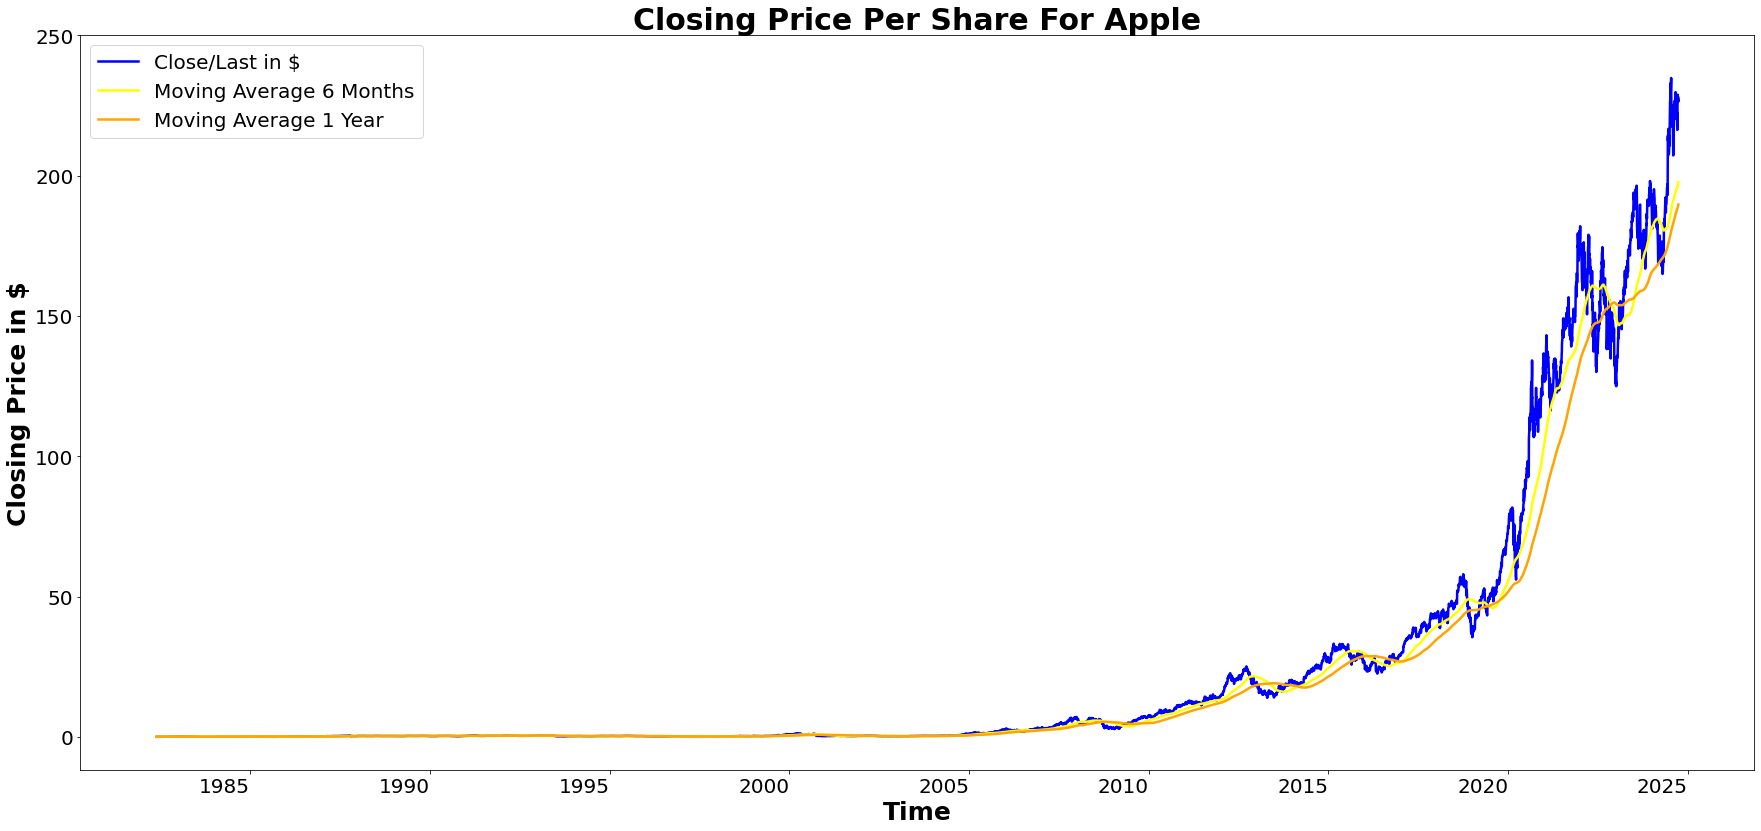

In [19]:
apple = plt.figure(figsize=(30,15))
moving_average_apple_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_apple_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_apple_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Apple', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

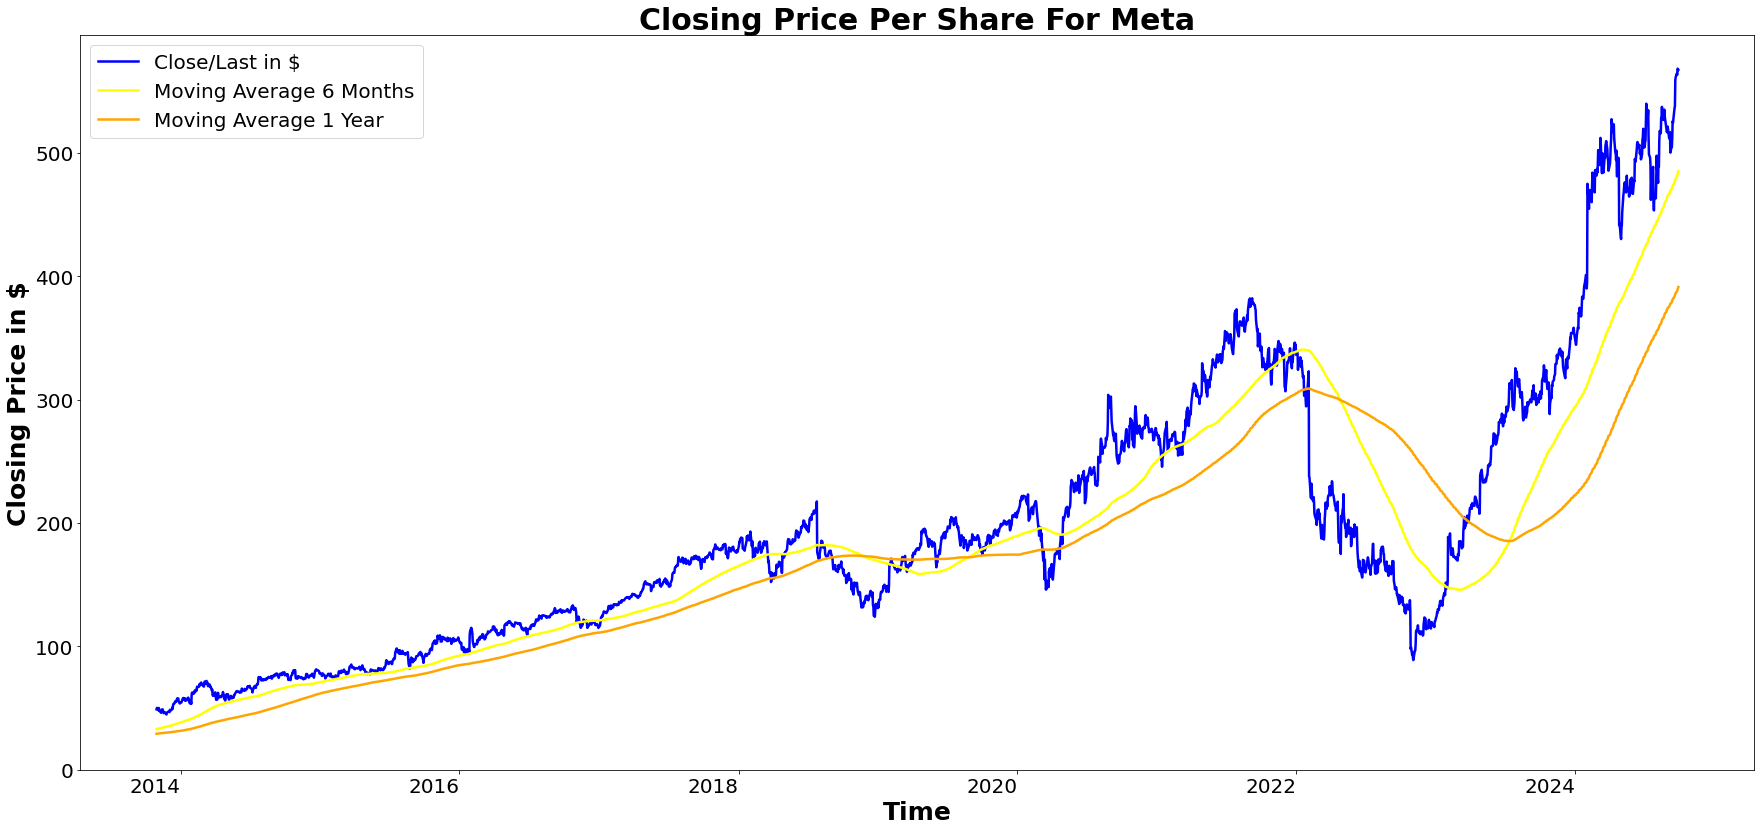

In [20]:
meta = plt.figure(figsize=(30,15))
moving_average_meta_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_meta_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_meta_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Meta', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

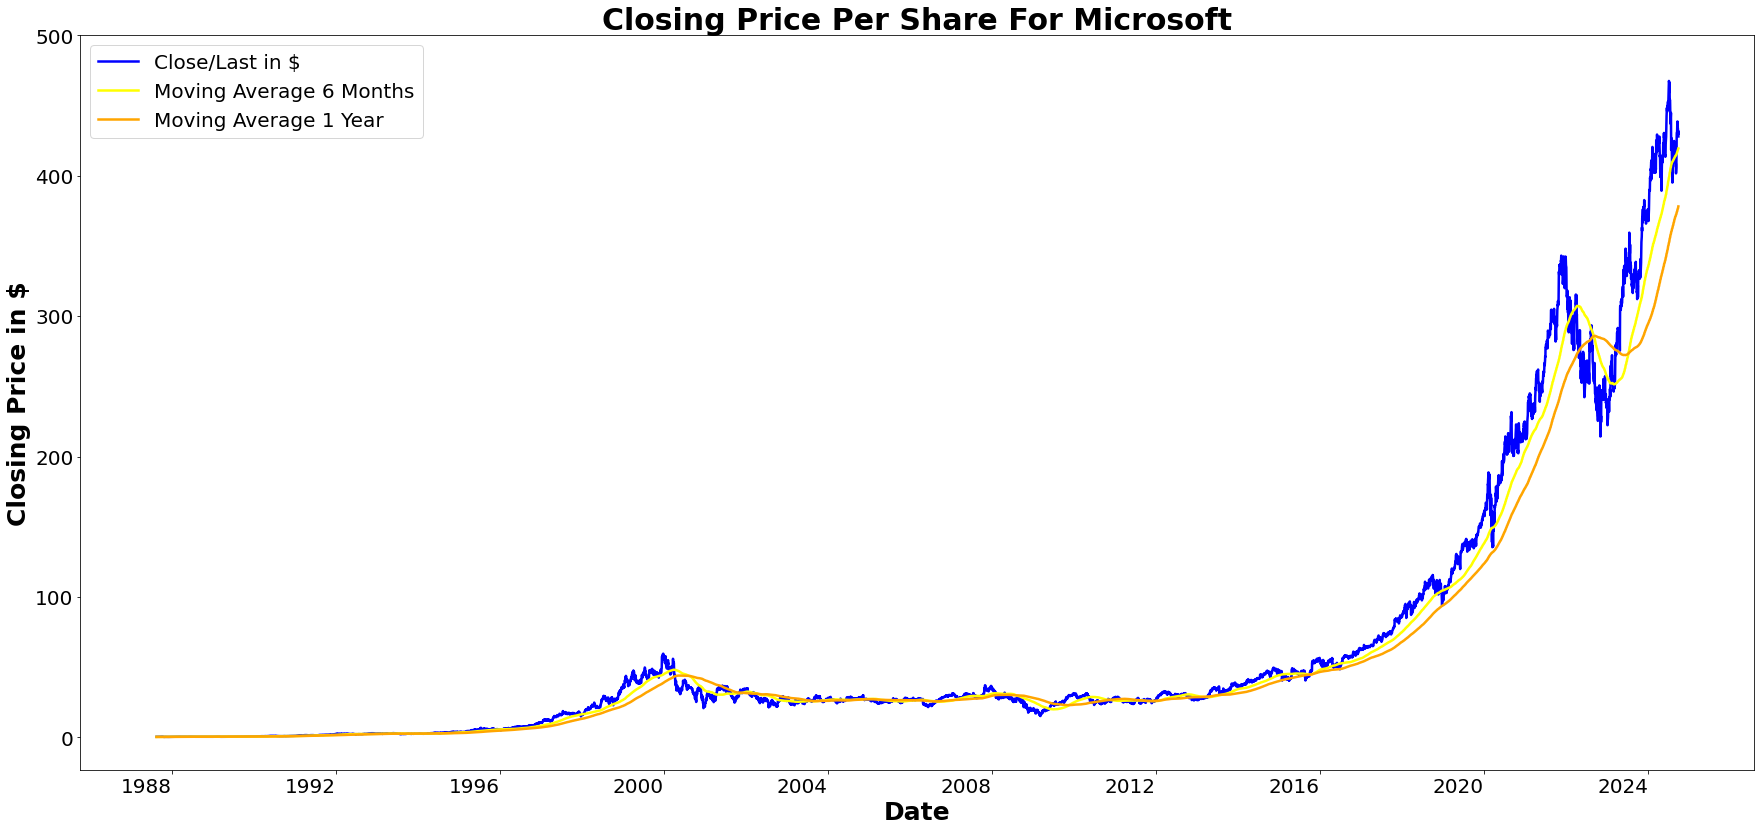

In [21]:
microsoft = plt.figure(figsize=(30,15))
moving_average_microsoft_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Microsoft', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

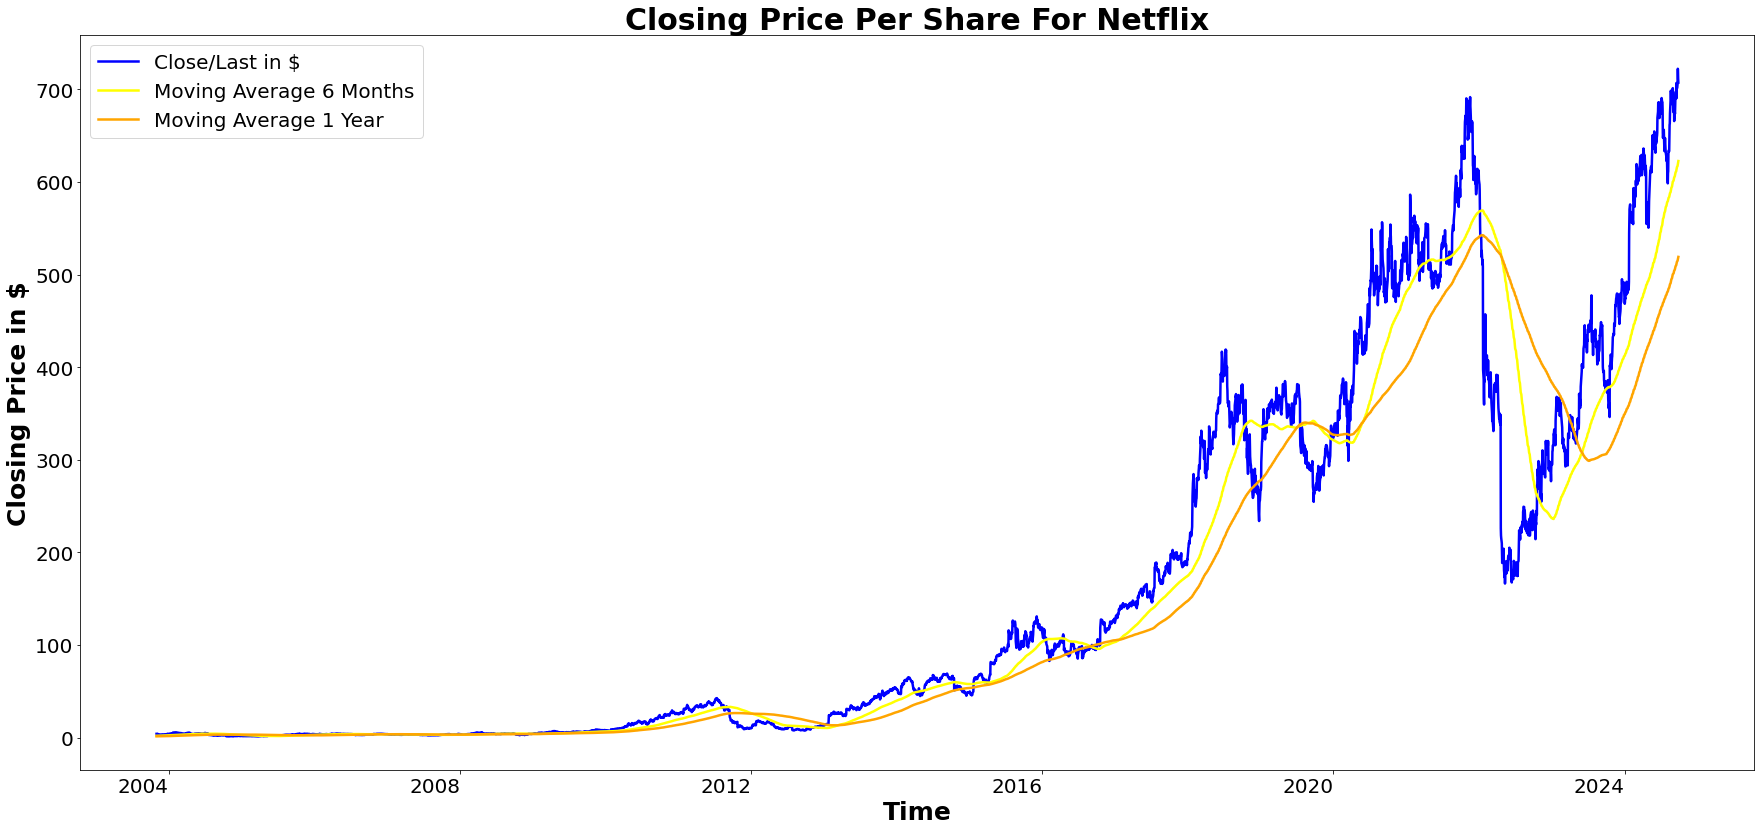

In [22]:
netflix = plt.figure(figsize=(30,15))
moving_average_netflix_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_netflix_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_netflix_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Netflix', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 800, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

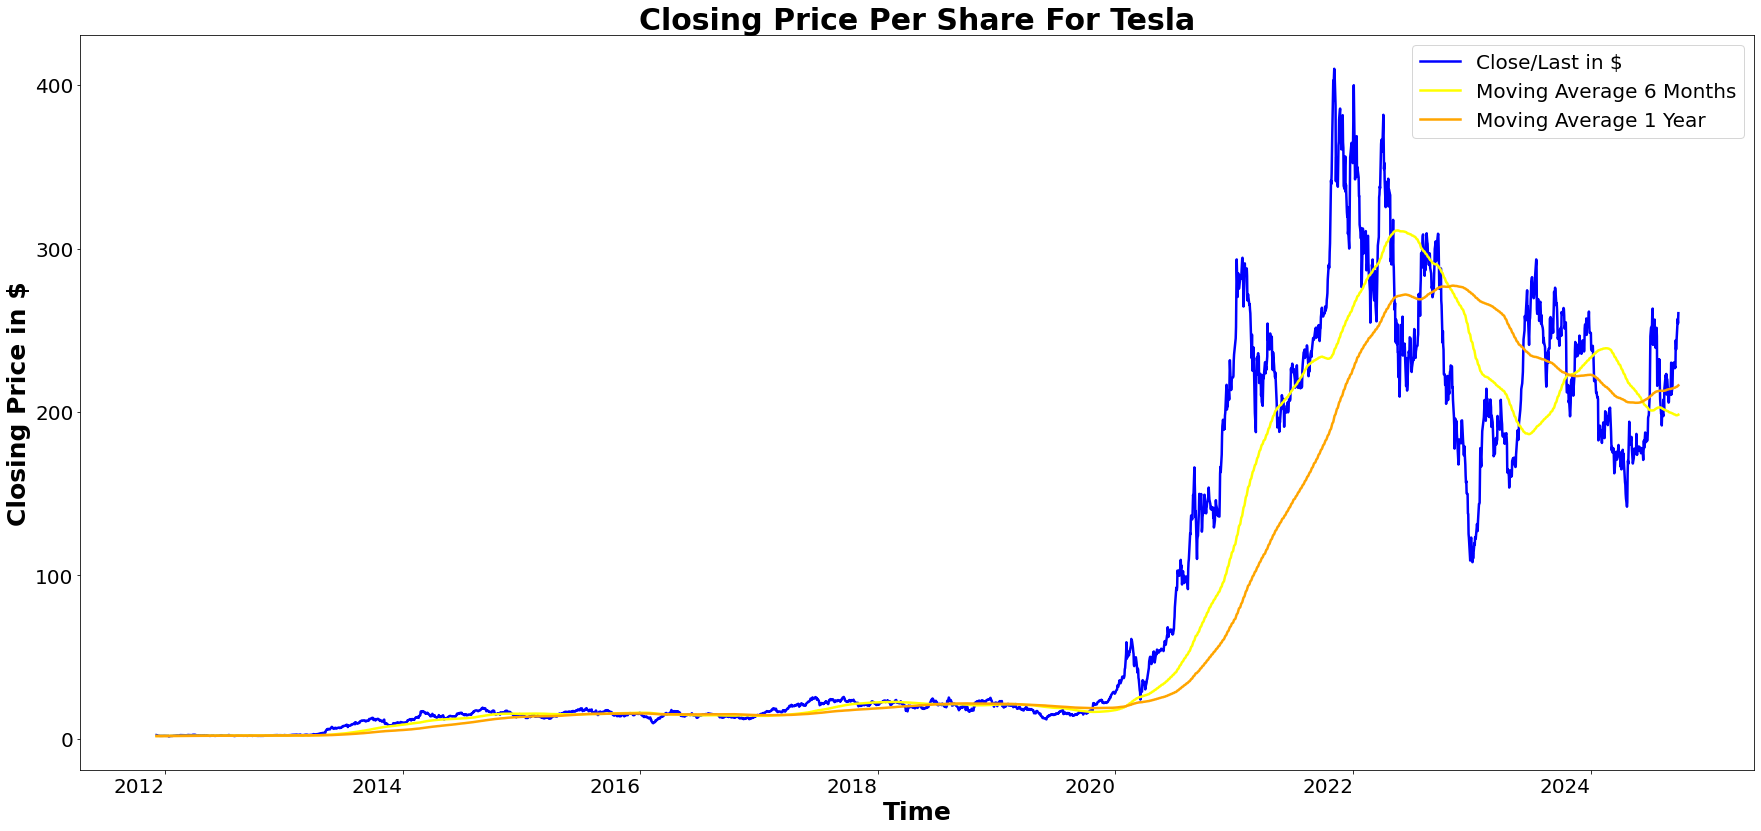

In [23]:
tesla = plt.figure(figsize=(30,15))
moving_average_tesla_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_tesla_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_tesla_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Tesla', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 500, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [24]:
shares_volume.savefig(os.path.join(path, 'Visualizations', 'shares_volume.png'))
six_stocks_ten_years.savefig(os.path.join(path, 'Visualizations', 'six_stocks_ten_years.png'))
amazon.savefig(os.path.join(path, 'Visualizations', 'amazon.png'))
apple.savefig(os.path.join(path, 'Visualizations', 'apple.png'))
meta.savefig(os.path.join(path, 'Visualizations', 'meta.png'))
microsoft.savefig(os.path.join(path, 'Visualizations', 'microsoft.png'))
netflix.savefig(os.path.join(path, 'Visualizations', 'netflix.png'))
tesla.savefig(os.path.join(path, 'Visualizations', 'tesla.png'))